In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Hopper experiment

#### Performance analysis

xhopperStdWithMinNoise-Adaptive-AdaptVar/S9.fit didn't exist
xhopperStdWithMinNoise-Adaptive-AdaptVar/S10.fit didn't exist


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'xhopperStdWoNoise'),
  Text(1, 0, 'xhopperStdWoNoiseAdptEnvVar'),
  Text(2, 0, 'xhopperStdWithNoise'),
  Text(3, 0, 'xhopperStdWithMinNoise-0.9'),
  Text(4, 0, 'xhopperStdWithMinNoise-Adaptive'),
  Text(5, 0, 'xhopperStdWithMinNoise-Adaptive-AdaptVar')])

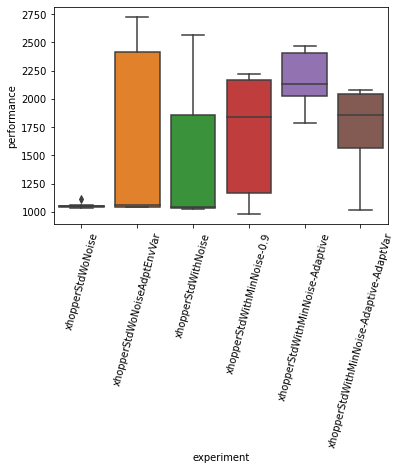

In [9]:
vStat = []
initSeed = 1
numSeed = 11
experiments = [
"xhopperStdWoNoise",
"xhopperStdWoNoiseAdptEnvVar",
"xhopperStdWithNoise",
#"xhopperStdWithMinNoise-1.5",
#"xhopperStdWithMinNoise-1.2",
"xhopperStdWithMinNoise-0.9",
"xhopperStdWithMinNoise-Adaptive",
"xhopperStdWithMinNoise-Adaptive-AdaptVar"
] #fill here the experiment

for experiment in experiments:
    for i in range(initSeed,numSeed):
        try:
            f = open(f"{experiment}/S{i}.fit", "r")
            vStat.append((experiment,i,float(f.read().split("bestgfit")[0].split("bestfit")[1].strip())))
        except:
            print(f"{experiment}/S{i}.fit didn't exist")
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
df = pd.DataFrame(vStat,columns=['experiment','seed','performance'])
ax = sns.boxplot(x=df.experiment,y=df.performance)
plt.xticks(rotation=75)

In [3]:
for exp in experiments:
    print(f"Performance of experiment {exp} ({numSeed} seeds): {df[df['experiment']==exp]['performance'].mean()} +- {df[df['experiment']==exp]['performance'].std()}")

Performance of experiment xhopperStdWoNoise (11 seeds): 1055.084 +- 22.275256427006365
Performance of experiment xhopperStdWithMinNoise-Adaptive-AdaptVar (11 seeds): 1752.7 +- 373.30721978399663
Performance of experiment xhopperStdWithNoise (11 seeds): 1498.959 +- 641.9654665764091
Performance of experiment xhopperStdWithMinNoise-0.9 (11 seeds): 1704.158 +- 526.6765211061193
Performance of experiment xhopperStdWithMinNoise-Adaptive (11 seeds): 2183.4839999999995 +- 227.52367448001735
Performance of experiment xhopperStdWoNoiseAdptEnvVar (11 seeds): 1640.878 +- 770.9093546772467


In [4]:
df[df['experiment']=='xhopperStdWoNoise']['performance'].mean()

1055.084

#### Noise Analysis - Standard Reward with PGN noise - no limitation

-- Loading data

In [5]:
seed = list(range(1,11))
motion = list(map(lambda x: x<5,seed))
noiseParameter = np.array([[-1.057036,-0.904793,-1.627683],
[-0.951210,-1.543393,-1.652689],
[-1.143012,-1.943825,-1.704224],
[-0.792456,-0.867625,-1.954244],
[-2.242359,-1.939327,-1.696721],
[-2.335426,-1.985879,-1.653965],
[-2.133642,-2.153280,-1.664309],
[-2.153533,-1.973502,-1.632281],
[-2.239090,-2.126331,-1.590877],
[-2.116482,-2.062976,-1.566676]])
noise0,noise1,noise2 = np.split(noiseParameter,3,axis=1)
data = zip(seed,motion,list(map(float,noise0)),list(map(float,noise1)),list(map(float,noise2)))
df = pd.DataFrame(data,columns=['seed','motion','noise0','noise1','noise2'])

**Ploting and Clustering**

Text(0, 0.5, 'noise1')

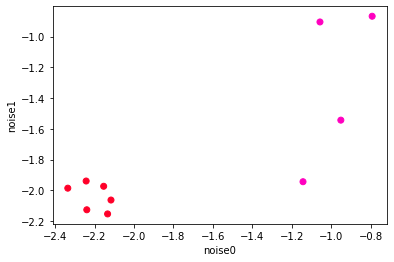

In [6]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], cmap='gist_rainbow')
plt.xlabel('noise0')
plt.ylabel('noise1')

In [7]:
# importando e instanciando o modelo com valor pré-definido de k
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2, random_state=1)

#treinando apenas com dois atributos
kmean.fit(df[['noise0','noise1']])
centers = kmean.cluster_centers_

Text(0.5, 1.0, 'Predicted')

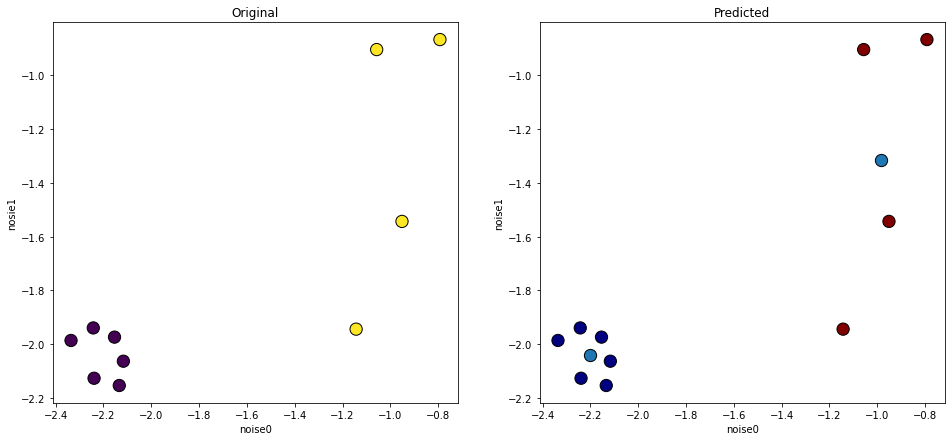

In [8]:
new_labels = kmean.labels_
# Plot the identified clusters and compare
fig, axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], edgecolor='k', s=150)
axes[1].scatter(df.iloc[:,2], df.iloc[:,3], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], edgecolor='k', s=150)
axes[0].set_xlabel('noise0')
axes[0].set_ylabel('nosie1')
axes[1].set_xlabel('noise0')
axes[1].set_ylabel('noise1')
axes[0].set_title('Original')
axes[1].set_title('Predicted')